In single stat, we performed single value statistics using pandas DataFrames and matplotlib functions.
Here, we are going to compare two sets of data using paired statistics.
Here, we are going to play a bit more with matplotlib, pandas, and numpy. 

importing files either from google drive or from local drive with the added functionality of obtaining two .xlsx sheets or two .csv files.

In [ ]:
# Just like in Module 1, we will import our files. The only difference here will
# be that two .csv files or two .xlsx sheets will be downloaded instead of one.

import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored

typ = int(input("Please enter a number for the file type you would like to upload (1).xlsx (2).csv:\n"))

if typ != 1 and typ != 2:
  print(colored('ERROR: invalid input entered. Please restart this section.', 'red'))

else:
  loc = int(input("Please enter a number for the resource location from which to import data (1)Google Drive (2)Local Drive:\n"))
  
  print('NOTE: For the following data, be sure a date column exists for each.')

  if loc != 1 and loc != 2:
    print(colored('ERROR: invalid input entered. Please restart this section.', 'red'))

  else:
    if loc == 1: # Google Drive
      
      print("Click on the link to get authentication to allow Google to access your Drive. You should see a screen with\n“Google Cloud SDK wants to access your Google Account” at the top. After you allow permission,\ncopy the given verification code and paste it in the box in Colab.")
      from google.colab import drive
      drive.mount('/content/drive')
      print()

      if typ == 1: # .xlsx
        FileName = input("Please copy the path of your .xlsx file and paste it here,\nyou can do that by going to the lefthand bar and clicking on the folder icon,\nthen go to your monted drive and go to your file,\nthen right click there and copy the path. ")
        print("\nLoading data...\n")

        dataFrame = pd.ExcelFile(FileName)
        print(dataFrame.sheet_names)

        sheet1 = input("Please type the exact first sheet name you would like to use data from:\n")
        sheet2 = input("Please type the exact second sheet name you would like to use data from:\n")
    
        sheet1_df = dataFrame.parse(sheet1)
        sheet2_df = dataFrame.parse(sheet2)
        
      elif typ == 2: # .csv
        FileName1 = input("please copy the path of your first .csv file and paste it here,\nyou can do that by going to the lefthand bar and clicking on the folder icon,\nthen go to your monted drive and go to your file,\nthen right click there and copy the path. ")
        FileName2 = input("please copy the path of your second .csv file and paste it here,\nyou can do that by going to the lefthand bar and clicking on the folder icon,\nthen go to your monted drive and go to your file,\nthen right click there and copy the path. ")

        sheet1_df = pd.read_csv(FileName1)
        sheet2_df = pd.read_csv(FileName2)
    
        sheet1 = input("Please input a name to represent the data from your first .csv file: ")
        sheet2 = input("Please input a name to represent the data from your second .csv file: ")

    elif loc == 2: # Local drive
      from google.colab import files
      import io
    
      if typ == 1: # .xlsx
        uploaded = list(files.upload().values())[0]
        dataFrame = pd.ExcelFile(io.BytesIO(uploaded))
        print(dataFrame.sheet_names)
        
        sheet1 = input("Please type the exact first sheet name you would like to use data from:\n")
        sheet2 = input("Please type the exact second sheet name you would like to use data from:\n")
    
        sheet1_df = dataFrame.parse(sheet1)
        sheet2_df = dataFrame.parse(sheet2)

      elif typ == 2: # .csv
        print('Please select the first .csv file to download (note: any files after the first will be ignored):')
        uploaded1 = list(files.upload().values())[0]
        print('Please select the second .csv file to download:')
        uploaded2= list(files.upload().values())[0]
        
        sheet1_df = pd.read_csv(io.BytesIO(uploaded1))
        sheet2_df = pd.read_csv(io.BytesIO(uploaded2))
    
        sheet1 = input("Please input a name to represent the data from your first .csv file: ")
        sheet2 = input("Please input a name to represent the data from your second .csv file: ")  

Please enter a number for the file type you would like to upload (1).xlsx (2).csv:
1
Please enter a number for the resource location from which to import data (1)Google Drive (2)Local Drive:
1
NOTE: For the following data, be sure a date column exists for each.
Click on the link to get authentication to allow Google to access your Drive. You should see a screen with
“Google Cloud SDK wants to access your Google Account” at the top. After you allow permission,
copy the given verification code and paste it in the box in Colab.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

E

this will ask the user to input the columns they would like to use. In this case, the date column is automatically selected for the x-axis. The users must then pick which columns to use for the y-axis from each dataset.


In [ ]:
print(sheet1,": ",list(sheet1_df.columns))
print(sheet2,": ",list(sheet2_df.columns))
print()

plot1 = 'date'
plot2a = input("Please enter the column from the first dataset (column names shown above) that you would like to use.\nPlease select numerical data: ")
if plot2a not in list(sheet1_df.columns):
  print(colored('\n*** ERROR: \'' + str(plot2a) + '\' not found in list of columns. Please re-run this block in order to avoid errors in later code. ***\n', 'red'))
plot2b = input("Please enter the column from the second dataset (column names shown above) that you would like to use.\nPlease select numerical data: ")
if plot2b not in list(sheet2_df.columns):
  print(colored('\n*** ERROR: \'' + str(plot2b) + '\' not found in list of columns. Please re-run this block in order to avoid errors in later code. ***\n', 'red'))

value1 = sheet1+" "+plot2a
value2 = sheet2+" "+plot2b

Fitbit_Steps_IntraDay :  ['Unnamed: 0', 'time', 'value', 'date']
Fitbit_Calories_IntraDay :  ['Unnamed: 0', 'level', 'mets', 'time', 'value', 'date']

Please enter the column from the first dataset (column names shown above) that you would like to use.
Please select numerical data: value
Please enter the column from the second dataset (column names shown above) that you would like to use.
Please select numerical data: value


Here, we will create a new pandas DataFrame to store the selected data.
We will also eliminate rows where values are 0.

In [ ]:
# Generating another DataFrame from selected columns
pairedData = pd.DataFrame({value1: sheet1_df[plot2a], value2: sheet2_df[plot2b]})

# Eliminating "0" values
pairedData = pairedData.loc[pairedData[value1] != 0]
pairedData = pairedData.loc[pairedData[value2] != 0]

print(pairedData)

       Fitbit_Steps_IntraDay value  Fitbit_Calories_IntraDay value
8609                            17                         3.07188
8623                            24                         3.07188
8624                            17                         3.29130
8626                            15                         3.51072
8628                            15                         3.07188
...                            ...                             ...
41583                           67                         5.90598
41584                           31                         3.93732
41585                           26                         3.28110
41586                           15                         3.06236
41587                            9                         2.84362

[6774 rows x 2 columns]


The Pearson Correlation coefficient tells us what the linear relationship between each set of data is. We expect the values along the diagonal to be 1; for the other entries, the closer the value is to 1 or -1, the stronger the relationship (in the latter case, the slope of the line of best fit is negative). If the value is closer to 0, this means the *linear* relationship is very weak or nonexistent.

In [ ]:
print("Pearson Correlation coefficient table:")
pairedData.corr(method='pearson')

Pearson Correlation coefficient table:


,Fitbit_Steps_IntraDay value,Fitbit_Calories_IntraDay value
Fitbit_Steps_IntraDay value,1.000000,0.808823
Fitbit_Calories_IntraDay value,0.808823,1.000000


In [ ]:
r = pairedData.corr(method ='pearson')
print("Pearson correlation coefficient between\n{} and {}: {}".format(value1, value2, r[value1][value2]))

Pearson correlation coefficient between
Fitbit_Steps_IntraDay value and Fitbit_Calories_IntraDay value: 0.8088232748023003


Now, we will perform principal component analysis (PCA).

The first step will be to perform single value decomposition (SVD).

Before we can do this, we must first center our data by subtracting the mean from both sets of data.

In [ ]:
from numpy import mean

Mean1 = mean(pairedData[value1])
Mean2 = mean(pairedData[value2])
print(Mean1)
print(Mean2)

pairedData[value1] = pairedData[value1] - Mean1
pairedData[value2] = pairedData[value2] - Mean2

print(pairedData)

29.63758488337762
4.058506921078908
       Fitbit_Steps_IntraDay value  Fitbit_Calories_IntraDay value
8609                    -12.637585                       -0.986627
8623                     -5.637585                       -0.986627
8624                    -12.637585                       -0.767207
8626                    -14.637585                       -0.547787
8628                    -14.637585                       -0.986627
...                            ...                             ...
41583                    37.362415                        1.847473
41584                     1.362415                       -0.121187
41585                    -3.637585                       -0.777407
41586                   -14.637585                       -0.996147
41587                   -20.637585                       -1.214887

[6774 rows x 2 columns]


The input to SVD is expected to have the shape *2xN*, but our data is currently *Nx2*. We can easily take the *transpose* of our data, effectively making our rows become the columns and vice versa.



In [ ]:
pairedData = pairedData.transpose()
print(pairedData)

                                    8609      8623   ...      41586      41587
Fitbit_Steps_IntraDay value    -12.637585 -5.637585  ... -14.637585 -20.637585
Fitbit_Calories_IntraDay value  -0.986627 -0.986627  ...  -0.996147  -1.214887

[2 rows x 6774 columns]


We can now compute the SVD and obtain *U*, *$\Sigma$*, and *V<sup>T</sup>*.



In [ ]:
from numpy.linalg import svd

U,S,VT = svd(pairedData,full_matrices=False)
print(U)
print()
print(S)
print()
print(VT)
print()


[[-0.99916711 -0.04080541]
 [-0.04080541  0.99916711]]

[2025.78637974   59.99711451]

[[ 0.00625304  0.00280047  0.00624862 ...  0.0018098   0.00723968
   0.01020343]
 [-0.00783576 -0.01259662 -0.00418163 ... -0.01047261 -0.00663406
  -0.00619613]]



We can transpose our data back to its original form so that we can now plot it.

In [ ]:
pairedData = pairedData.transpose()
print(pairedData)

       Fitbit_Steps_IntraDay value  Fitbit_Calories_IntraDay value
8609                    -12.637585                       -0.986627
8623                     -5.637585                       -0.986627
8624                    -12.637585                       -0.767207
8626                    -14.637585                       -0.547787
8628                    -14.637585                       -0.986627
...                            ...                             ...
41583                    37.362415                        1.847473
41584                     1.362415                       -0.121187
41585                    -3.637585                       -0.777407
41586                   -14.637585                       -0.996147
41587                   -20.637585                       -1.214887

[6774 rows x 2 columns]


Now, we can plot our data and view the relationship between our two sets of data.

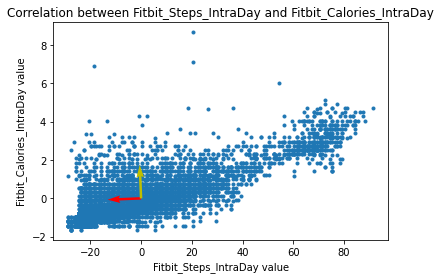

In [ ]:
plt.plot(pairedData[value1], pairedData[value2], '.', zorder=0)
plt.title('Correlation between ' + sheet1 + ' and ' + sheet2)

plt.quiver(0, 0, U[0][0], U[0][1], scale=10, color=['r'], zorder=1)
plt.quiver(0, 0, U[1][0], U[1][1], scale=10, color=['y'], zorder=1)
plt.xlabel(value1)
plt.ylabel(value2)
plt.show()

Among other things, $\Sigma$ represents the strength of the correlation between each direction defined by our unit vectors. We can improve our plot by scaling each unit vector *u<sub>i</sub>* by their corresponding *$\sigma$<sub>i</sub>* from $\Sigma$.

σ1: 2025.7863797369246
σ2: 59.99711451263079



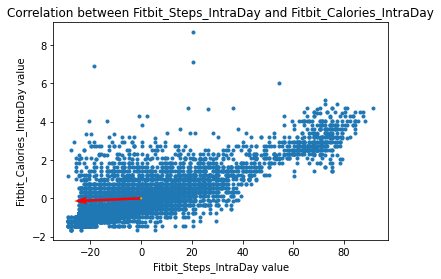

In [ ]:
print('\u03C31: ' + str(S[0]))
print('\u03C32: ' + str(S[1]) + '\n')

plt.plot(pairedData[value1], pairedData[value2], '.', zorder=0)

plt.quiver(0, 0, U[0][0], U[0][1], scale = 5, color=['r'], zorder=1)
plt.quiver(0, 0, U[1][0], U[1][1], scale = 5*S[0]/S[1], color=['y'], zorder=1)
plt.title('Correlation between ' + sheet1 + ' and ' + sheet2)
plt.xlabel(value1)
plt.ylabel(value2)
plt.show()